# Neural Network with Cubic Data (multi-dimensional)
- y = x^3 -3x^2 -9x -1
- 5 hidden layers

## 1.Import Required Libraries

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable
#from visdom import Visdom
#viz = Visdom()

## 2. Data Generation

In [3]:
num_data = 1000
num_epoch = 5000

x = init.uniform(torch.Tensor(num_data,1),-10,10)
y = (x**3) - 3*(x**2) - 9*x - 1

noise = init.normal(torch.FloatTensor(num_data,1),std=3)

y_noise = y + noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  import sys


In [11]:
y

tensor([[-1.3463e+01],
        [-9.3221e+00],
        [-1.1532e+02],
        [ 6.0075e+01],
        [-2.4960e+01],
        [ 2.9366e+02],
        [ 4.5508e+02],
        [ 8.2205e+01],
        [-1.1599e+01],
        [-1.1396e+01],
        [-1.7461e+01],
        [-2.7619e+02],
        [ 3.2271e+02],
        [-4.8085e+00],
        [-1.6338e+02],
        [-1.2169e+01],
        [-1.7313e+00],
        [ 3.0366e+02],
        [-4.3615e+02],
        [-8.5831e+02],
        [-1.2174e+01],
        [ 1.0165e+02],
        [-1.0719e+01],
        [ 3.9302e+00],
        [ 1.2873e+02],
        [-5.7631e+01],
        [ 3.6042e+00],
        [-3.2315e+00],
        [-3.6617e+02],
        [ 9.7507e-01],
        [-3.0267e+00],
        [-1.8228e+01],
        [-1.2216e+01],
        [-1.3617e+01],
        [ 3.7043e+02],
        [-3.7870e+02],
        [-2.5812e+02],
        [ 4.3908e+01],
        [ 2.8190e+01],
        [-6.5832e+00],
        [-3.9945e+02],
        [-4.4397e+02],
        [-2.7477e+01],
        [ 1

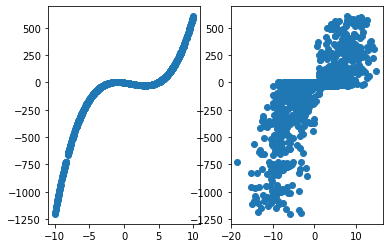

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(x, y)
ax2 = fig.add_subplot(122)
ax2.scatter((x+noise), y)

In [ ]:
# visualize data

input_data = torch.cat([x,y_noise],1)

win=viz.scatter(
    X = input_data,
    opts=dict(
        xtickmin=-10,
        xtickmax=10,
        xtickstep=1,
        ytickmin=0,
        ytickmax=500,
        ytickstep=1,
        markersymbol='dot',
        markercolor=np.random.randint(0, 255, num_data),
        markersize=5,
    ),
)

In [ ]:
# visualize data

win=viz.scatter(
    X = torch.cat([x,y],1),
    opts=dict(
        xtickmin=-10,
        xtickmax=10,
        xtickstep=1,
        ytickmin=0,
        ytickmax=500,
        ytickstep=1,
        markersymbol='dot',
        markercolor=np.random.randint(0, 255, num_data),
        markersize=5,
    ),
)

## 3. Model & Optimizer

In [12]:


model = nn.Sequential(
            nn.Linear(1,20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
            nn.Linear(10,5),
            nn.ReLU(),
            nn.Linear(5,1),
        )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

## 4. Train 

In [15]:
loss_arr =[]
label = y_noise

for i in range(num_epoch):
    output = model(x)
    optimizer.zero_grad()

    loss = loss_func(output,label)
    loss.backward()
    
    optimizer.step()
    
    if i % 100 ==0:
        print(loss)
        
    #loss_arr.append(loss.cpu().data.numpy()[0])
    loss_arr.append(loss.item())

tensor(29.4897, grad_fn=<L1LossBackward0>)
tensor(29.2260, grad_fn=<L1LossBackward0>)
tensor(26.8030, grad_fn=<L1LossBackward0>)
tensor(26.4063, grad_fn=<L1LossBackward0>)
tensor(27.1218, grad_fn=<L1LossBackward0>)
tensor(27.6600, grad_fn=<L1LossBackward0>)
tensor(27.8049, grad_fn=<L1LossBackward0>)
tensor(26.7231, grad_fn=<L1LossBackward0>)
tensor(25.4840, grad_fn=<L1LossBackward0>)
tensor(26.1898, grad_fn=<L1LossBackward0>)
tensor(26.5383, grad_fn=<L1LossBackward0>)
tensor(25.8189, grad_fn=<L1LossBackward0>)
tensor(23.9615, grad_fn=<L1LossBackward0>)
tensor(26.4943, grad_fn=<L1LossBackward0>)
tensor(24.2430, grad_fn=<L1LossBackward0>)
tensor(23.4885, grad_fn=<L1LossBackward0>)
tensor(25.2250, grad_fn=<L1LossBackward0>)
tensor(25.4506, grad_fn=<L1LossBackward0>)
tensor(25.2066, grad_fn=<L1LossBackward0>)
tensor(24.4389, grad_fn=<L1LossBackward0>)
tensor(25.1846, grad_fn=<L1LossBackward0>)
tensor(24.7552, grad_fn=<L1LossBackward0>)
tensor(24.7739, grad_fn=<L1LossBackward0>)
tensor(23.9

In [14]:
param_list = list(model.parameters())
print(param_list)



[Parameter containing:
tensor([[-0.9211],
        [-1.0892],
        [ 0.4836],
        [-0.0054],
        [ 0.4256],
        [-0.9352],
        [ 1.5520],
        [ 0.1748],
        [ 0.5975],
        [-0.2055],
        [ 0.3843],
        [-0.1234],
        [-0.9219],
        [-0.5752],
        [-1.4143],
        [ 1.0794],
        [ 0.7356],
        [ 0.8380],
        [ 0.4903],
        [-0.4352]], requires_grad=True), Parameter containing:
tensor([-3.9413, -4.1513, -0.7623, -0.0535,  3.2693, -5.7872, -4.6320, -0.1096,
        -1.0495, -0.2545, -0.0130,  0.3413, -1.6387, -1.0481, -2.5826, -3.1143,
        -0.2562,  1.0773,  3.8054, -2.7767], requires_grad=True), Parameter containing:
tensor([[ 1.1605e+00,  1.2704e+00, -1.2251e-01, -1.7361e-01, -6.1282e-02,
          2.1169e+00,  1.5258e-01,  1.7482e-01,  1.4331e-01,  2.1142e-01,
          8.8562e-03,  2.4212e-01,  7.2510e-01,  6.4732e-01,  1.1002e+00,
         -9.2974e-02,  2.0384e-01, -3.1302e-01, -3.1927e-01,  1.1043e+00],
        

## 5. Visualize Trained Output

In [ ]:
win2=viz.scatter(
    X = torch.cat([x, output],1),
    opts=dict(
        xtickmin=-10,
        xtickmax=10,
        xtickstep=1,
        ytickmin=0,
        ytickmax=500,
        ytickstep=1,
        markersymbol='dot',
        markercolor=np.random.randint(0, 255, num_data),
        markersize=5,
    ),
)



## 6. Visualize Loss Graph

In [ ]:
x = np.reshape([i for i in range(num_epoch)],newshape=[num_epoch,1])
loss_data = np.reshape(loss_arr,newshape=[num_epoch,1])

win3=viz.line(
    X = x,
    Y = loss_data, 
)

AssertionError: X and Y should be the same shape